# COVID MÉXICO

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [2]:
#Se carga el dataframe

df = pd.read_csv("201114COVID19MEXICO.csv", encoding = "latin1")
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-11-14,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-11-14,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,2020-11-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
3,2020-11-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
4,2020-11-14,13757c,1,12,15,1,15,15,106,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,2020-11-14,20edd4,2,4,30,1,30,30,44,1,...,2,2,2,1,4,6,99,MÃ©xico,97,97
2604655,2020-11-14,3b9335,1,4,6,1,6,6,2,1,...,2,2,2,2,97,6,99,MÃ©xico,97,97
2604656,2020-11-14,1ef034,2,10,9,1,13,15,58,2,...,2,2,2,2,97,1,99,MÃ©xico,97,2
2604657,2020-11-14,2e7cc4,2,12,15,1,15,15,63,1,...,2,2,1,2,97,6,99,MÃ©xico,97,97


In [3]:
#Se ven todas las columnas que componen el dataframe, así como el tipo de elemento que hay en cada una

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604659 entries, 0 to 2604658
Data columns (total 38 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   FECHA_ACTUALIZACION  object
 1   ID_REGISTRO          object
 2   ORIGEN               int64 
 3   SECTOR               int64 
 4   ENTIDAD_UM           int64 
 5   SEXO                 int64 
 6   ENTIDAD_NAC          int64 
 7   ENTIDAD_RES          int64 
 8   MUNICIPIO_RES        int64 
 9   TIPO_PACIENTE        int64 
 10  FECHA_INGRESO        object
 11  FECHA_SINTOMAS       object
 12  FECHA_DEF            object
 13  INTUBADO             int64 
 14  NEUMONIA             int64 
 15  EDAD                 int64 
 16  NACIONALIDAD         int64 
 17  EMBARAZO             int64 
 18  HABLA_LENGUA_INDIG   int64 
 19  INDIGENA             int64 
 20  DIABETES             int64 
 21  EPOC                 int64 
 22  ASMA                 int64 
 23  INMUSUPR             int64 
 24  HIPERTENSION         int

In [4]:
#Se analizan las variables numéricas

df.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,UCI
count,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,...,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06
mean,1.653697e+00,9.305706e+00,1.497912e+01,1.485867e+00,1.593824e+01,1.521911e+01,3.572881e+01,1.152521e+00,8.273965e+01,2.574456e+00,...,2.275956e+00,2.140302e+00,2.272887e+00,2.224780e+00,1.239754e+01,1.083095e+00,9.638235e+00,5.268265e+00,9.860378e+01,8.276828e+01
std,4.757912e-01,3.632421e+00,8.130242e+00,4.998003e-01,9.908850e+00,8.069411e+00,4.663257e+01,3.595252e-01,3.396808e+01,8.118889e+00,...,5.301842e+00,5.230812e+00,5.261679e+00,5.427951e+00,3.073970e+01,2.760257e-01,2.630911e+01,1.899884e+00,6.195444e+00,3.392957e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,9.900000e+01,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.400000e+01,1.000000e+00,1.500000e+01,1.400000e+01,2.000000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,9.900000e+01,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.100000e+01,2.000000e+00,2.200000e+01,2.100000e+01,4.300000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,9.900000e+01,9.700000e+01
max,2.000000e+00,9.900000e+01,3.200000e+01,2.000000e+00,9.900000e+01,3.200000e+01,9.990000e+02,2.000000e+00,9.900000e+01,9.900000e+01,...,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.900000e+01


In [5]:
#Value_counts a todas las variables

for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("*******")

FECHA_ACTUALIZACION
2020-11-14    2604659
Name: FECHA_ACTUALIZACION, dtype: int64
*******
ID_REGISTRO
15f632    1
30e102    1
212e87    1
1d3aa1    1
36d2b3    1
         ..
138778    1
17172b    1
175b4f    1
0ec5f5    1
3adbdd    1
Name: ID_REGISTRO, Length: 2604659, dtype: int64
*******
ORIGEN
2    1702658
1     902001
Name: ORIGEN, dtype: int64
*******
SECTOR
12    1611918
4      688559
6      101789
9       91924
3       39429
8       20858
10      17393
5       16433
11      10552
13       2119
7        2022
2        1228
1         425
99         10
Name: SECTOR, dtype: int64
*******
ENTIDAD_UM
9     673853
15    205372
19    141464
11    140816
14    102669
21     97366
5      95386
27     89121
28     86086
24     77564
26     74511
30     70134
16     66236
2      65772
31     53443
25     50864
8      50128
10     43274
12     41708
7      40913
1      40630
3      38562
22     36733
20     35570
13     32113
32     28833
23     28726
29     25061
4      20660
17     19621
18


## Preprocesamiento de los datos

In [6]:
#Se eliminan las siguiente columnas, ya que se consideran que no aportan mucho información para el análisis que se pretende hacer

df = df.drop(["FECHA_ACTUALIZACION",
              "ID_REGISTRO",
              "MUNICIPIO_RES",
              "PAIS_ORIGEN",
              "PAIS_NACIONALIDAD",
              "MIGRANTE",
              "RESULTADO_LAB",
              "ENTIDAD_RES",
              "ENTIDAD_NAC",
              "HABLA_LENGUA_INDIG",
              "INDIGENA"],
              axis = 1)
df

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI
0,2,9,21,2,1,2020-03-18,2020-03-12,9999-99-99,97,2,...,2,2,1,2,2,2,2,1,3,97
1,1,4,5,1,1,2020-04-02,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97
2,2,4,9,2,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,1,2,2,2,1,2,99,1,3,1
3,1,4,15,2,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,2,2,2,99,1,3,2
4,1,12,15,1,1,2020-03-31,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,2,4,30,1,1,2020-10-14,2020-10-14,9999-99-99,97,2,...,2,2,2,2,2,2,2,1,6,97
2604655,1,4,6,1,1,2020-10-11,2020-10-03,9999-99-99,97,2,...,1,2,2,2,2,2,2,2,6,97
2604656,2,10,9,1,2,2020-10-09,2020-10-07,9999-99-99,2,2,...,2,2,2,2,2,2,2,2,1,2
2604657,2,12,15,1,1,2020-10-01,2020-09-30,9999-99-99,97,2,...,2,2,2,2,2,2,1,2,6,97


In [7]:
#Se eliminan aquellos patrones en los que la prueba de covid no diera un resultado determinante

df = df.drop(df[df["CLASIFICACION_FINAL"].isin([4,5,6])].index, axis = 0)
df = df.reset_index(drop = True)
df

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI
0,2,9,21,2,1,2020-03-18,2020-03-12,9999-99-99,97,2,...,2,2,1,2,2,2,2,1,3,97
1,1,4,5,1,1,2020-04-02,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97
2,2,4,9,2,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,1,2,2,2,1,2,99,1,3,1
3,1,4,15,2,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,2,2,2,99,1,3,2
4,1,12,15,1,1,2020-03-31,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226001,1,6,9,2,2,2020-10-12,2020-10-12,2020-10-12,1,1,...,98,98,98,98,98,98,2,2,1,2
2226002,1,12,26,2,1,2020-10-13,2020-10-09,9999-99-99,97,2,...,2,2,2,2,2,2,1,2,1,97
2226003,1,6,9,1,2,2020-10-16,2020-10-09,2020-10-24,1,1,...,1,2,2,2,2,2,2,2,1,2
2226004,2,10,9,2,2,2020-11-09,2020-11-09,9999-99-99,2,2,...,2,2,2,2,2,2,2,2,1,2


In [8]:
#En la variable CLASIFICACION_FINAL, que refleja los diferentes escenarios de los resultados del test covid, se dejan los 1 como positivos y los 0 como negativo

df["CLASIFICACION_FINAL"] = df["CLASIFICACION_FINAL"].replace({2 : 1, 3 : 1, 7 : 0})
df

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI
0,2,9,21,2,1,2020-03-18,2020-03-12,9999-99-99,97,2,...,2,2,1,2,2,2,2,1,1,97
1,1,4,5,1,1,2020-04-02,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,1,97
2,2,4,9,2,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,1,2,2,2,1,2,99,1,1,1
3,1,4,15,2,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,2,2,2,99,1,1,2
4,1,12,15,1,1,2020-03-31,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,1,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226001,1,6,9,2,2,2020-10-12,2020-10-12,2020-10-12,1,1,...,98,98,98,98,98,98,2,2,1,2
2226002,1,12,26,2,1,2020-10-13,2020-10-09,9999-99-99,97,2,...,2,2,2,2,2,2,1,2,1,97
2226003,1,6,9,1,2,2020-10-16,2020-10-09,2020-10-24,1,1,...,1,2,2,2,2,2,2,2,1,2
2226004,2,10,9,2,2,2020-11-09,2020-11-09,9999-99-99,2,2,...,2,2,2,2,2,2,2,2,1,2


In [9]:
#En determinadas columnas se sustituyen los 97 (No aplica) por 2 (No)
#Por ejemplo, en el caso de EMBARAZO, el 97 (No aplica) se le asigna a todos los hombres

df[["INTUBADO", "EMBARAZO", "UCI"]] = df[["INTUBADO", "EMBARAZO", "UCI"]].replace(97, 2)
df

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI
0,2,9,21,2,1,2020-03-18,2020-03-12,9999-99-99,2,2,...,2,2,1,2,2,2,2,1,1,2
1,1,4,5,1,1,2020-04-02,2020-03-27,9999-99-99,2,2,...,2,2,2,2,2,2,1,1,1,2
2,2,4,9,2,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,1,2,2,2,1,2,99,1,1,1
3,1,4,15,2,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,2,2,2,99,1,1,2
4,1,12,15,1,1,2020-03-31,2020-03-27,9999-99-99,2,2,...,2,2,2,2,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226001,1,6,9,2,2,2020-10-12,2020-10-12,2020-10-12,1,1,...,98,98,98,98,98,98,2,2,1,2
2226002,1,12,26,2,1,2020-10-13,2020-10-09,9999-99-99,2,2,...,2,2,2,2,2,2,1,2,1,2
2226003,1,6,9,1,2,2020-10-16,2020-10-09,2020-10-24,1,1,...,1,2,2,2,2,2,2,2,1,2
2226004,2,10,9,2,2,2020-11-09,2020-11-09,9999-99-99,2,2,...,2,2,2,2,2,2,2,2,1,2


In [10]:
#Se crea una nueva variable que refleje si el paciente ha acabado falleciendo o no

df["MUERTE"] = df["FECHA_DEF"].map(lambda x : 0 if x == "9999-99-99" else 1)

In [11]:
#Se sustituyen los 98 (se ignora) y los 99 (no se especifica) por NaN

df = df.replace({98 : np.nan, 99 : np.nan})
df

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE
0,2.0,9.0,21.0,2.0,1.0,2020-03-18,2020-03-12,9999-99-99,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0.0
1,1.0,4.0,5.0,1.0,1.0,2020-04-02,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
2,2.0,4.0,9.0,2.0,2.0,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,...,2.0,2.0,2.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0
3,1.0,4.0,15.0,2.0,2.0,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,1.0
4,1.0,12.0,15.0,1.0,1.0,2020-03-31,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226001,1.0,6.0,9.0,2.0,2.0,2020-10-12,2020-10-12,2020-10-12,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,1.0
2226002,1.0,12.0,26.0,2.0,1.0,2020-10-13,2020-10-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,0.0
2226003,1.0,6.0,9.0,1.0,2.0,2020-10-16,2020-10-09,2020-10-24,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
2226004,2.0,10.0,9.0,2.0,2.0,2020-11-09,2020-11-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0


In [12]:
#Se ve el número de NaN (en porcentaje) que hay por variable

df.isnull().sum()/len(df)*100

ORIGEN                 0.000000
SECTOR                 0.000449
ENTIDAD_UM             0.000000
SEXO                   0.000000
TIPO_PACIENTE          0.000000
FECHA_INGRESO          0.000000
FECHA_SINTOMAS         0.000000
FECHA_DEF              0.000000
INTUBADO               0.265273
NEUMONIA               0.306064
EDAD                   0.017835
NACIONALIDAD           0.000000
EMBARAZO               0.354941
DIABETES               0.320529
EPOC                   0.298112
ASMA                   0.293800
INMUSUPR               0.312488
HIPERTENSION           0.300988
OTRA_COM               0.458939
CARDIOVASCULAR         0.298382
OBESIDAD               0.284590
RENAL_CRONICA          0.293800
TABAQUISMO             0.311275
OTRO_CASO              9.752489
TOMA_MUESTRA           0.000000
CLASIFICACION_FINAL    0.000000
UCI                    0.285489
MUERTE                 0.000000
dtype: float64

In [13]:
#Se decide imputar el valor más frecuente (la moda) de la variable OTRO_CASO a los patrones que tienen NaN

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['OTRO_CASO'] = imputer.fit_transform(df['OTRO_CASO'].values.reshape(2226006,1))
df

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE
0,2.0,9.0,21.0,2.0,1.0,2020-03-18,2020-03-12,9999-99-99,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0.0
1,1.0,4.0,5.0,1.0,1.0,2020-04-02,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
2,2.0,4.0,9.0,2.0,2.0,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,...,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
3,1.0,4.0,15.0,2.0,2.0,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0
4,1.0,12.0,15.0,1.0,1.0,2020-03-31,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226001,1.0,6.0,9.0,2.0,2.0,2020-10-12,2020-10-12,2020-10-12,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,1.0
2226002,1.0,12.0,26.0,2.0,1.0,2020-10-13,2020-10-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,0.0
2226003,1.0,6.0,9.0,1.0,2.0,2020-10-16,2020-10-09,2020-10-24,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
2226004,2.0,10.0,9.0,2.0,2.0,2020-11-09,2020-11-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0


In [14]:
#Una vez que se ha solucionado los NaN en la variable OTRO_CASO (que representaban un 10% del total de patrones), se procede a analizar el resto de NaN
#Para ello, se eliminan aquellos patrones que tienen algún NaN
#Se pasa de 2.226.006 patrones a 2.195.185 patrones (se ha eliminado el 1,4% de todos los patrones)

df.dropna(axis=0, inplace = True) 
df

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE
0,2.0,9.0,21.0,2.0,1.0,2020-03-18,2020-03-12,9999-99-99,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0.0
1,1.0,4.0,5.0,1.0,1.0,2020-04-02,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
2,2.0,4.0,9.0,2.0,2.0,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,...,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
3,1.0,4.0,15.0,2.0,2.0,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0
4,1.0,12.0,15.0,1.0,1.0,2020-03-31,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226000,2.0,10.0,9.0,2.0,2.0,2020-10-03,2020-10-01,2020-10-20,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
2226002,1.0,12.0,26.0,2.0,1.0,2020-10-13,2020-10-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,0.0
2226003,1.0,6.0,9.0,1.0,2.0,2020-10-16,2020-10-09,2020-10-24,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
2226004,2.0,10.0,9.0,2.0,2.0,2020-11-09,2020-11-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0


In [15]:
df.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA',
       'CLASIFICACION_FINAL', 'UCI', 'MUERTE'],
      dtype='object')

In [16]:
#Se convierten las columnas numéricos que tienen números enteros a formato int8

columnas_numericas = ['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'TIPO_PACIENTE',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA',
       'CLASIFICACION_FINAL', 'UCI', 'MUERTE']

df[columnas_numericas] = df[columnas_numericas].astype("int8")


## ANÁLISIS DE LOS DATOS

Se calculan una serie de parámetros considerados importantes del conjunto de datos. Se empiezan con los resultado numéricos:

In [17]:
#Número de positivos

len(df[df["CLASIFICACION_FINAL"] == 1])

991464

In [18]:
#Número de defunciones

len(df[df["MUERTE"] == 1])

120540

In [19]:
#Porcentaje de defunciones sobre positivos

len(df[df["MUERTE"] == 1])/len(df[df["CLASIFICACION_FINAL"] == 1])*100

12.157778799835395

In [20]:
#Número de positivos en cada estado

dic_estados = {
                1 : "AGUASCALIENTES",
                2 : "BAJA CALIFORNIA",
                3 : "BAJA CALIFORNIA SUR",
                4 : "CAMPECHE",
                5 : "COAHUILA DE ZARAGOZA",
                6 : "COLIMA",
                7 : "CHIAPAS",
                8 : "CHIHUAHUA",
                9 : "CIUDAD DE MÉXICO",
                10 : "DURANGO",
                11 : "GUANAJUATO",
                12 : "GUERRERO",
                13 : "HIDALGO",
                14 : "JALISCO",
                15 : "MÉXICO",
                16 : "MICHOACÁN DE OCAMPO",
                17 : "MORELOS",
                18 : "NAYARIT",
                19 : "NUEVO LEÓN",
                20 : "OAXACA",
                21 : "PUEBLA",
                22 : "QUERÉTARO",
                23 : "QUINTANA ROO",
                24 : "SAN LUIS POTOSÍ",
                25 : "SINALOA",
                26 : "SONORA",
                27 : "TABASCO",
                28 : "TAMAULIPAS",
                29 : "TLAXCALA",
                30 : "VERACRUZ DE IGNACIO DE LA LLAVE",
                31 : "YUCATÁN",
                32 : "ZACATECAS"
                }

df_estado = pd.DataFrame(df[df["CLASIFICACION_FINAL"] == 1]["ENTIDAD_UM"].value_counts()).reset_index()
df_estado.columns = [["Estado", "Positivos"]]
df_estado = df_estado.replace(dic_estados)
df_estado

,Estado,Positivos
0,CIUDAD DE MÉXICO,210252
1,MÉXICO,70447
2,NUEVO LEÓN,59957
3,GUANAJUATO,53865
4,SONORA,40203
5,PUEBLA,38387
6,VERACRUZ DE IGNACIO DE LA LLAVE,37292
7,COAHUILA DE ZARAGOZA,36928
8,JALISCO,35653
9,TABASCO,35554


In [21]:
#3 estados con mayor número de positivos

df_estado.head(3)

,Estado,Positivos
0,CIUDAD DE MÉXICO,210252
1,MÉXICO,70447
2,NUEVO LEÓN,59957


In [22]:
#Edad promedio de los positivos

df[df["CLASIFICACION_FINAL"] == 1]["EDAD"].mean()

44.27547444990439

In [23]:
#Edad promedio de los que han fallecido

df[df["MUERTE"] == 1]["EDAD"].mean()

62.32794922847188

In [24]:
#Tiempo medio entre la columna FECHA_SINTOMAS y la columna FECHA_DEF para los que han fallecido

df_fecha = df[df["MUERTE"] == 1].reset_index(drop = True)

lista_fechas = []

for i in range(len(df_fecha)):
    fecha_sintomas = datetime.datetime.strptime(df_fecha.loc[i,"FECHA_SINTOMAS"], "%Y-%m-%d")
    fecha_muerte = datetime.datetime.strptime(df_fecha.loc[i,"FECHA_DEF"], "%Y-%m-%d")
    lista_fechas.append((fecha_muerte - fecha_sintomas).days)
    
np.array(lista_fechas).mean()

12.858868425418947

In [25]:
#¿Cuál es la enfermedad con más prevalencia en los positivos?

enfermedades = ["DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA"]

dic = dict()

for i in enfermedades:
    num = len(df[(df['CLASIFICACION_FINAL']==1) & (df[i] == 1)])
    dic[num] = i
    
dic.get(np.array(list(dic.keys())).max())

'HIPERTENSION'

In [26]:
#¿Cuál es la enfermedad con más prevalencia en los fallecidos?

enfermedades = ["DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA"]

dic = dict()

for i in enfermedades:
    num = len(df[(df['MUERTE']==1) & (df[i] == 1)])
    dic[num] = i
    
dic.get(np.array(list(dic.keys())).max())

'HIPERTENSION'


#### A continuación siguen los resultados gráficos

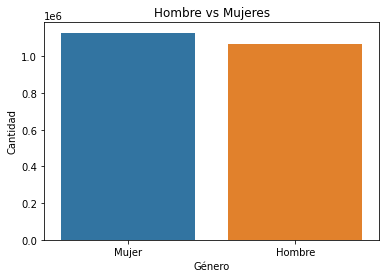

In [31]:
#Gráfica de barras del número de hombres y mujeres

fig, ax = plt.subplots()
ax = sns.countplot(x = df["SEXO"])
ax.set(xlabel = "Género")
ax.set(ylabel = "Cantidad")
ax.set_xticklabels(["Mujer", "Hombre"])
plt.title("Hombre vs Mujeres")
plt.show()

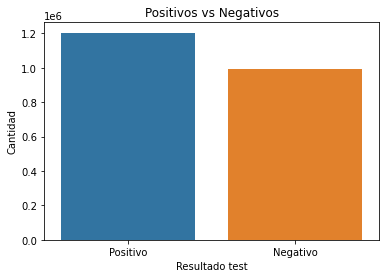

In [32]:
#Grafica de barras de los positivos y no positivos

fig, ax = plt.subplots()
ax = sns.countplot(x = df["CLASIFICACION_FINAL"])
ax.set(xlabel = "Resultado test")
ax.set(ylabel = "Cantidad")
ax.set_xticklabels(["Positivo", "Negativo"])
plt.title("Positivos vs Negativos")
plt.show()

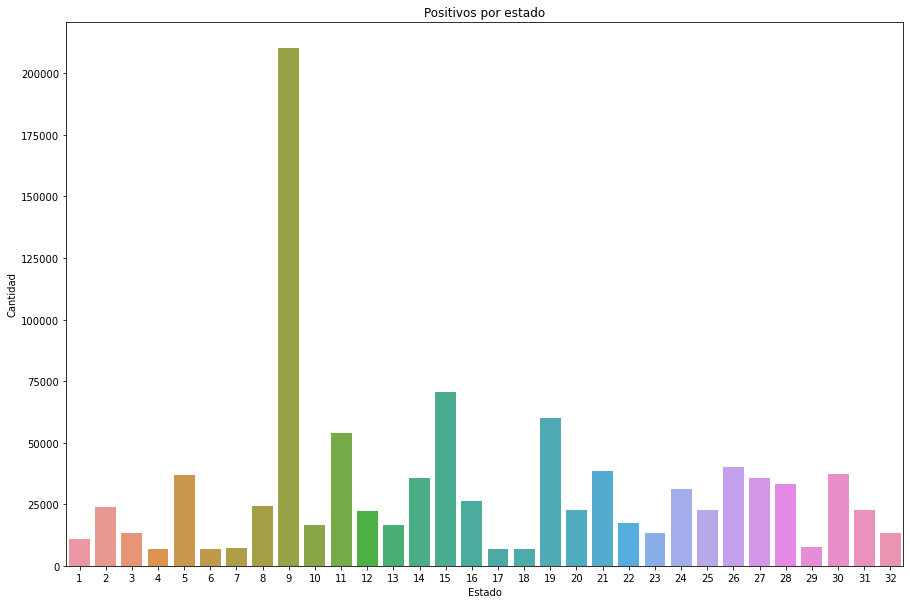

In [34]:
#Gráfica de barras del número de positivos por estado

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x = df[df["CLASIFICACION_FINAL"] == 1]["ENTIDAD_UM"])
ax.set(xlabel = "Estado")
ax.set(ylabel = "Cantidad")
plt.title("Positivos por estado")
plt.show()

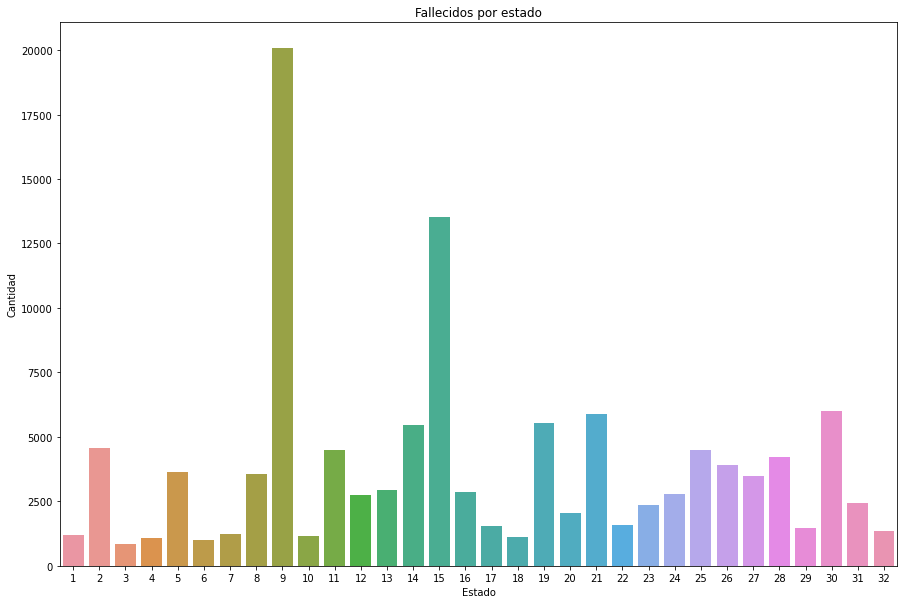

In [35]:
#Gráfica de barras del número de fallecidos por estado

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x = df[df["MUERTE"] == 1]["ENTIDAD_UM"])
ax.set(xlabel = "Estado")
ax.set(ylabel = "Cantidad")
plt.title("Fallecidos por estado")
plt.show()

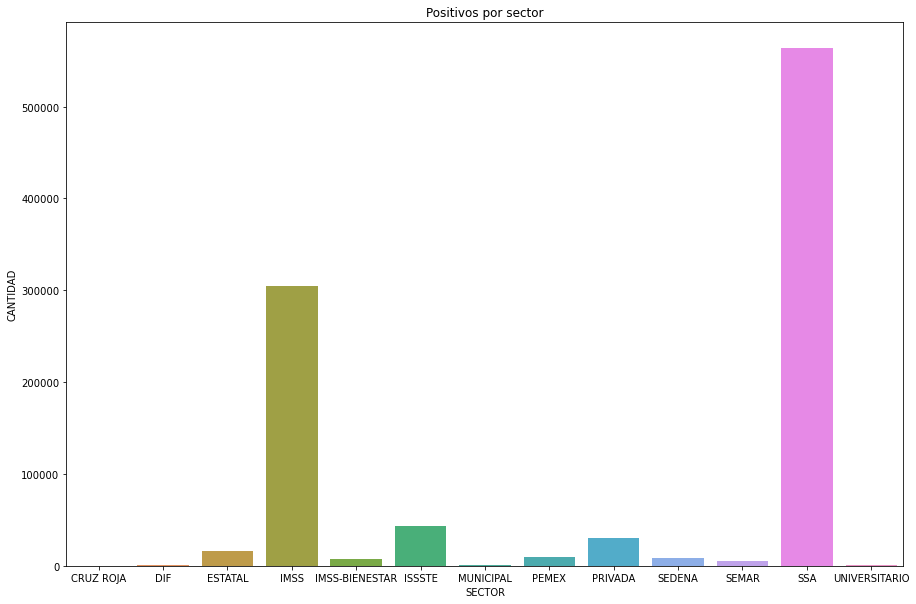

In [36]:
#Gráfica de barras del número de positivos por la columna SECTOR

lista_sector = [
"CRUZ ROJA",
"DIF",
"ESTATAL",
"IMSS",
"IMSS-BIENESTAR",
"ISSSTE",
"MUNICIPAL",
"PEMEX",
"PRIVADA",
"SEDENA",
"SEMAR",
"SSA",
"UNIVERSITARIO"
]

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x = df[df["CLASIFICACION_FINAL"] == 1]["SECTOR"])
ax.set(xlabel = "SECTOR")
ax.set(ylabel = "CANTIDAD")
ax.set_xticklabels(lista_sector)
plt.title("Positivos por sector")
plt.show()

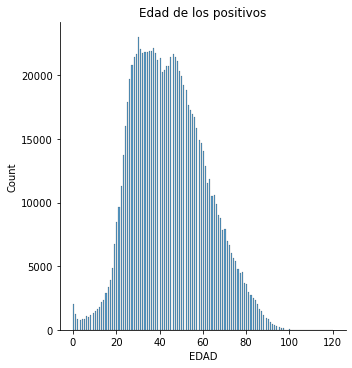

In [37]:
#Histograma de la edad de los positivos

sns.displot(df[df["CLASIFICACION_FINAL"] == 1]["EDAD"])
plt.title("Edad de los positivos")
plt.show()

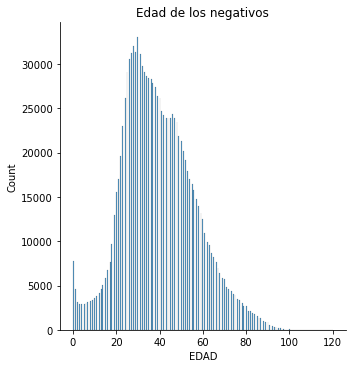

In [38]:
#Histograma de la edad de los no positivos

sns.displot(df[df["CLASIFICACION_FINAL"] == 0]["EDAD"])
plt.title("Edad de los negativos")
plt.show()

In [39]:
#Mapa de calor de México con el número de positivos por estado utilizando folium

mexico_map = folium.Map(location=[21.8818,-102.291], zoom_start=5)

mexico_geo = r'mexico22.json'

df_mexico = df.copy()
df_mexico["ENTIDAD_UM"] = df_mexico["ENTIDAD_UM"].replace({
                1 : "AGUASCALIENTES",
                2 : "BAJA CALIFORNIA",
                3 : "BAJA CALIFORNIA SUR",
                4 : "CAMPECHE",
                5 : "COAHUILA DE ZARAGOZA",
                6 : "COLIMA",
                7 : "CHIAPAS",
                8 : "CHIHUAHUA",
                9 : "CIUDAD DE MÉXICO",
                10 : "DURANGO",
                11 : "GUANAJUATO",
                12 : "GUERRERO",
                13 : "HIDALGO",
                14 : "JALISCO",
                15 : "MÉXICO",
                16 : "MICHOACÁN DE OCAMPO",
                17 : "MORELOS",
                18 : "NAYARIT",
                19 : "NUEVO LEÓN",
                20 : "OAXACA",
                21 : "PUEBLA",
                22 : "QUERÉTARO",
                23 : "QUINTANA ROO",
                24 : "SAN LUIS POTOSÍ",
                25 : "SINALOA",
                26 : "SONORA",
                27 : "TABASCO",
                28 : "TAMAULIPAS",
                29 : "TLAXCALA",
                30 : "VERACRUZ DE IGNACIO DE LA LLAVE",
                31 : "YUCATÁN",
                32 : "ZACATECAS",
                })
df_mexico = df_mexico[df_mexico["CLASIFICACION_FINAL"] == 1].groupby('ENTIDAD_UM')['CLASIFICACION_FINAL'].sum().sort_values(ascending = False)
df_mexico = pd.DataFrame(df_mexico).reset_index()

df_mexico["ENTIDAD_UM"] = df_mexico["ENTIDAD_UM"].map(lambda x : x.title())

df_mexico["ENTIDAD_UM"] = df_mexico["ENTIDAD_UM"].replace({
    "Ciudad De México" : "CDMX",
    "México" : "Estado De Mexico",
    "Nuevo León" : "Nuevo Leon",
    "San Luis Potosí" : "San Luis Potosi",
    "Michoacán De Ocampo" : "Michoacan De Ocampo",
    "Yucatán" : "Yucatan",
    "Querétaro" : "Queretaro"})

folium.Choropleth(
    geo_data=mexico_geo,
    data=df_mexico,
    columns=['ENTIDAD_UM', 'CLASIFICACION_FINAL'],
    key_on='feature.properties.name',
     fill_color='Blues', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Positivos covid en México'
    ).add_to(mexico_map)

mexico_map

In [40]:
#Mapa de calor de México con el número de fallecidos por estado utilizando folium

mexico_map = folium.Map(location=[21.8818,-102.291], zoom_start=5)

mexico_geo = r'mexico22.json'

df_mexico = df.copy()
df_mexico["ENTIDAD_UM"] = df_mexico["ENTIDAD_UM"].replace({
                1 : "AGUASCALIENTES",
                2 : "BAJA CALIFORNIA",
                3 : "BAJA CALIFORNIA SUR",
                4 : "CAMPECHE",
                5 : "COAHUILA DE ZARAGOZA",
                6 : "COLIMA",
                7 : "CHIAPAS",
                8 : "CHIHUAHUA",
                9 : "CIUDAD DE MÉXICO",
                10 : "DURANGO",
                11 : "GUANAJUATO",
                12 : "GUERRERO",
                13 : "HIDALGO",
                14 : "JALISCO",
                15 : "MÉXICO",
                16 : "MICHOACÁN DE OCAMPO",
                17 : "MORELOS",
                18 : "NAYARIT",
                19 : "NUEVO LEÓN",
                20 : "OAXACA",
                21 : "PUEBLA",
                22 : "QUERÉTARO",
                23 : "QUINTANA ROO",
                24 : "SAN LUIS POTOSÍ",
                25 : "SINALOA",
                26 : "SONORA",
                27 : "TABASCO",
                28 : "TAMAULIPAS",
                29 : "TLAXCALA",
                30 : "VERACRUZ DE IGNACIO DE LA LLAVE",
                31 : "YUCATÁN",
                32 : "ZACATECAS",
                })

df_mexico = df_mexico[df_mexico["MUERTE"] == 1].groupby('ENTIDAD_UM')['MUERTE'].sum().sort_values(ascending = False)
df_mexico = pd.DataFrame(df_mexico).reset_index()

df_mexico["ENTIDAD_UM"] = df_mexico["ENTIDAD_UM"].map(lambda x : x.title())

df_mexico["ENTIDAD_UM"] = df_mexico["ENTIDAD_UM"].replace({
    "Ciudad De México" : "CDMX",
    "México" : "Estado De Mexico",
    "Nuevo León" : "Nuevo Leon",
    "San Luis Potosí" : "San Luis Potosi",
    "Michoacán De Ocampo" : "Michoacan De Ocampo",
    "Yucatán" : "Yucatan",
    "Querétaro" : "Queretaro"})

folium.Choropleth(
    geo_data=mexico_geo,
    data=df_mexico,
    columns=['ENTIDAD_UM', 'MUERTE'],
    key_on='feature.properties.name',
     fill_color='Blues', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Positivos covid en México'
    ).add_to(mexico_map)

mexico_map